# 02 - Target Variable Analysis

This notebook focuses on analyzing the target variable (price) in the enriched FIPE datasets. We'll examine:
- Price distribution (histograms and box plots)
- Skewness and kurtosis
- Outlier detection (IQR method, Z-score)
- Price ranges by vehicle category
- Price trends over time
- Price by brand, model, and state

## Datasets
- `fipe_cars_enriched.csv`: Historical FIPE data (~599k records)
- `fipe_2022_enriched.csv`: 2022 FIPE data subset (~290k records)


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
from scipy import stats
from scipy.stats import skew, kurtosis

# Add src to path to import our modules
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / "src"))

from data.loader import DatasetLoader

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Imports completed successfully")


✅ Imports completed successfully


## 1. Load Datasets


In [2]:
# Initialize loader
loader = DatasetLoader()

# Load both datasets
df_cars, df_2022 = loader.load_all()

print("\n" + "="*60)
print("Datasets loaded successfully!")
print("="*60)


Loading /app/data/processed/fipe_cars_enriched.csv...
Loaded 599,007 rows and 16 columns
Loading /app/data/processed/fipe_2022_enriched.csv...
Loaded 290,275 rows and 16 columns

Datasets loaded successfully!


## 2. Price Distribution Analysis


In [3]:
# Basic price statistics
print("="*60)
print("Price Statistics - fipe_cars_enriched")
print("="*60)
print(df_cars['price'].describe())

print("\n" + "="*60)
print("Price Statistics - fipe_2022_enriched")
print("="*60)
print(df_2022['price'].describe())


Price Statistics - fipe_cars_enriched
count    599007.00
mean     111580.60
std      291223.74
min        1679.00
25%       20150.00
50%       42989.00
75%       96921.00
max     8600000.00
Name: price, dtype: float64

Price Statistics - fipe_2022_enriched
count    290275.00
mean     122087.21
std      321913.89
min        1831.00
25%       21875.00
50%       46836.00
75%      106165.00
max     8600000.00
Name: price, dtype: float64


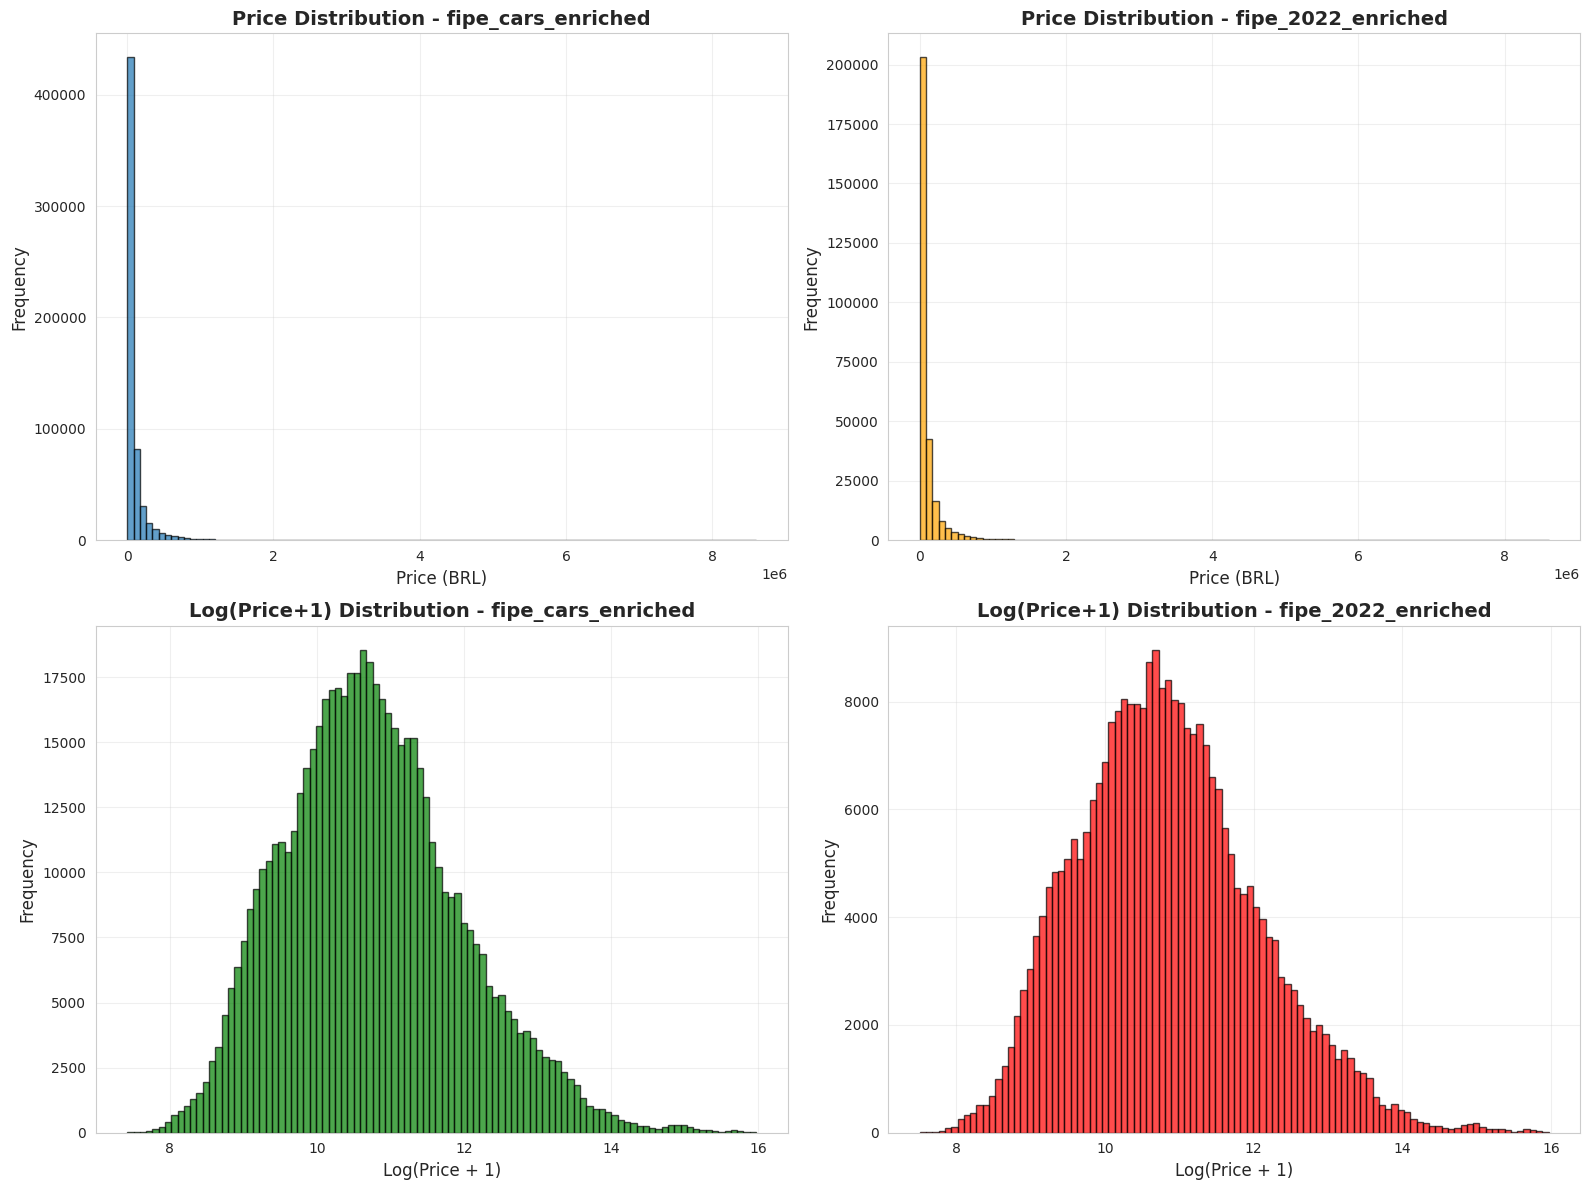

In [5]:
# Histogram of price distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram - fipe_cars_enriched
axes[0, 0].hist(df_cars['price'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Price Distribution - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price (BRL)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Histogram - fipe_2022_enriched
axes[0, 1].hist(df_2022['price'], bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Price Distribution - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Price (BRL)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Log-transformed histogram - fipe_cars_enriched
log_price_cars = np.log1p(df_cars['price'])
axes[1, 0].hist(log_price_cars, bins=100, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Log(Price+1) Distribution - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Log(Price + 1)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Log-transformed histogram - fipe_2022_enriched
log_price_2022 = np.log1p(df_2022['price'])
axes[1, 1].hist(log_price_2022, bins=100, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('Log(Price+1) Distribution - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Log(Price + 1)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


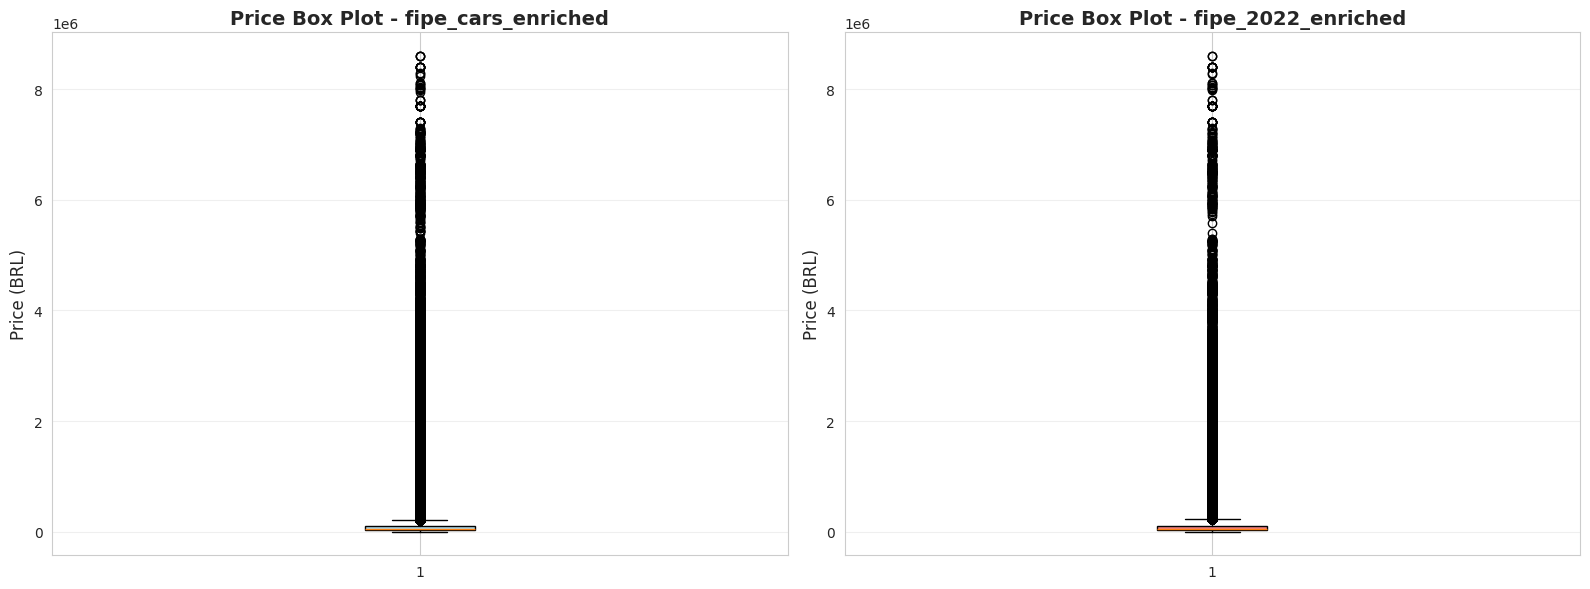

In [6]:
# Box plots for price distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot - fipe_cars_enriched
bp1 = axes[0].boxplot(df_cars['price'], vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightblue')
axes[0].set_title('Price Box Plot - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price (BRL)', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot - fipe_2022_enriched
bp2 = axes[1].boxplot(df_2022['price'], vert=True, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightcoral')
axes[1].set_title('Price Box Plot - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price (BRL)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


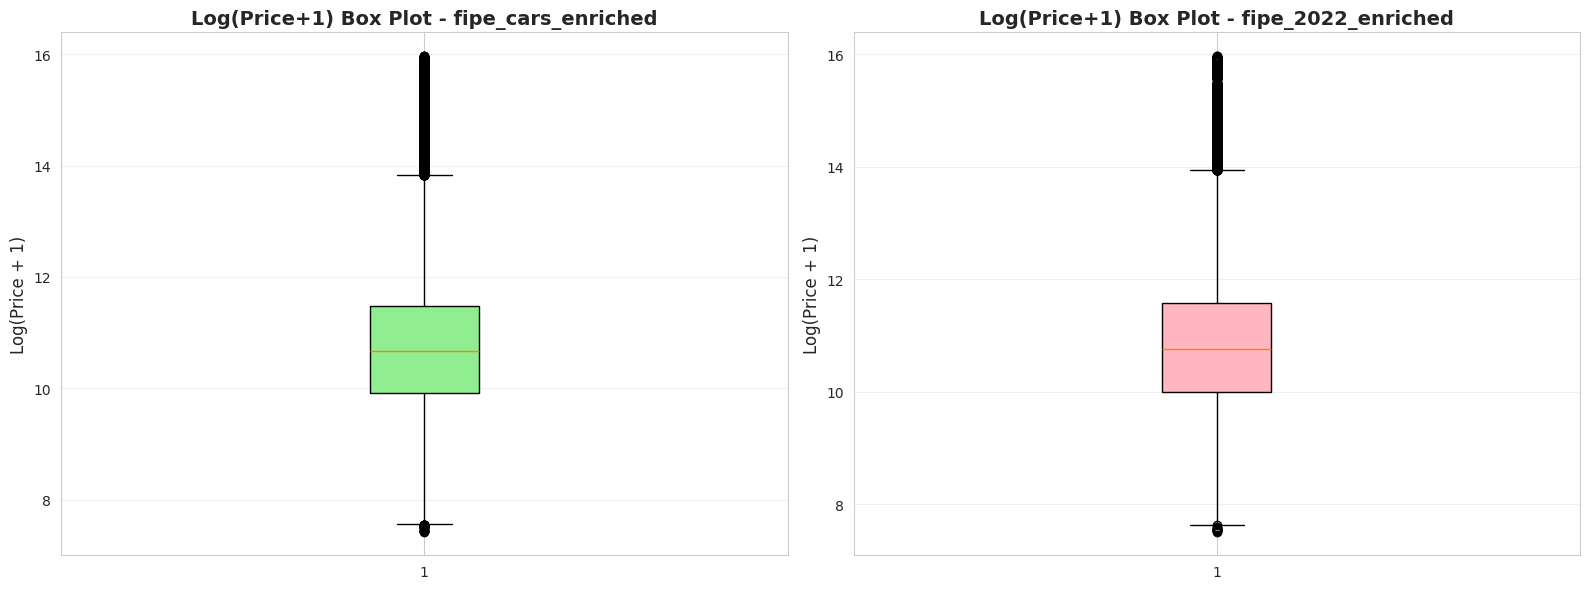

In [7]:
# Box plots with log transformation (better visualization)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Log-transformed box plot - fipe_cars_enriched
bp1 = axes[0].boxplot(log_price_cars, vert=True, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightgreen')
axes[0].set_title('Log(Price+1) Box Plot - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Log(Price + 1)', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Log-transformed box plot - fipe_2022_enriched
bp2 = axes[1].boxplot(log_price_2022, vert=True, patch_artist=True)
bp2['boxes'][0].set_facecolor('lightpink')
axes[1].set_title('Log(Price+1) Box Plot - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Log(Price + 1)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 3. Skewness and Kurtosis


In [8]:
# Calculate skewness and kurtosis
def calculate_skewness_kurtosis(name: str, price_series: pd.Series):
    """Calculate and display skewness and kurtosis for price distribution."""
    price_skew = skew(price_series)
    price_kurt = kurtosis(price_series)
    
    print(f"\n{'='*60}")
    print(f"Skewness and Kurtosis - {name}")
    print(f"{'='*60}")
    print(f"Skewness: {price_skew:.4f}")
    print(f"  → Interpretation: {'Right-skewed (positive)' if price_skew > 0 else 'Left-skewed (negative)' if price_skew < 0 else 'Symmetric'}")
    if abs(price_skew) > 1:
        print(f"  → ⚠️  Highly skewed distribution (|skewness| > 1)")
    elif abs(price_skew) > 0.5:
        print(f"  → ⚠️  Moderately skewed distribution (|skewness| > 0.5)")
    else:
        print(f"  → ✅ Approximately symmetric distribution")
    
    print(f"\nKurtosis: {price_kurt:.4f}")
    print(f"  → Interpretation: {'Heavy tails (leptokurtic)' if price_kurt > 3 else 'Light tails (platykurtic)' if price_kurt < 3 else 'Normal tails (mesokurtic)'}")
    if price_kurt > 3:
        print(f"  → ⚠️  Distribution has heavier tails than normal (more outliers)")
    elif price_kurt < 3:
        print(f"  → Distribution has lighter tails than normal")
    else:
        print(f"  → ✅ Normal tail distribution")
    
    return price_skew, price_kurt

# Calculate for both datasets
skew_cars, kurt_cars = calculate_skewness_kurtosis("fipe_cars_enriched", df_cars['price'])
skew_2022, kurt_2022 = calculate_skewness_kurtosis("fipe_2022_enriched", df_2022['price'])



Skewness and Kurtosis - fipe_cars_enriched
Skewness: 11.6600
  → Interpretation: Right-skewed (positive)
  → ⚠️  Highly skewed distribution (|skewness| > 1)

Kurtosis: 201.6620
  → Interpretation: Heavy tails (leptokurtic)
  → ⚠️  Distribution has heavier tails than normal (more outliers)

Skewness and Kurtosis - fipe_2022_enriched
Skewness: 11.4504
  → Interpretation: Right-skewed (positive)
  → ⚠️  Highly skewed distribution (|skewness| > 1)

Kurtosis: 188.4494
  → Interpretation: Heavy tails (leptokurtic)
  → ⚠️  Distribution has heavier tails than normal (more outliers)


## 4. Outlier Detection


In [9]:
# IQR Method for Outlier Detection
def detect_outliers_iqr(price_series: pd.Series, name: str):
    """Detect outliers using IQR method."""
    Q1 = price_series.quantile(0.25)
    Q3 = price_series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = price_series[(price_series < lower_bound) | (price_series > upper_bound)]
    outlier_pct = (len(outliers) / len(price_series)) * 100
    
    print(f"\n{'='*60}")
    print(f"Outlier Detection (IQR Method) - {name}")
    print(f"{'='*60}")
    print(f"Q1 (25th percentile): R$ {Q1:,.2f}")
    print(f"Q3 (75th percentile): R$ {Q3:,.2f}")
    print(f"IQR: R$ {IQR:,.2f}")
    print(f"Lower bound (Q1 - 1.5*IQR): R$ {lower_bound:,.2f}")
    print(f"Upper bound (Q3 + 1.5*IQR): R$ {upper_bound:,.2f}")
    print(f"\nOutliers detected: {len(outliers):,} ({outlier_pct:.2f}%)")
    print(f"Min outlier value: R$ {outliers.min():,.2f}" if len(outliers) > 0 else "No lower outliers")
    print(f"Max outlier value: R$ {outliers.max():,.2f}" if len(outliers) > 0 else "No upper outliers")
    
    return outliers, lower_bound, upper_bound

# Detect outliers for both datasets
outliers_cars, lb_cars, ub_cars = detect_outliers_iqr(df_cars['price'], "fipe_cars_enriched")
outliers_2022, lb_2022, ub_2022 = detect_outliers_iqr(df_2022['price'], "fipe_2022_enriched")



Outlier Detection (IQR Method) - fipe_cars_enriched
Q1 (25th percentile): R$ 20,150.00
Q3 (75th percentile): R$ 96,921.00
IQR: R$ 76,771.00
Lower bound (Q1 - 1.5*IQR): R$ -95,006.50
Upper bound (Q3 + 1.5*IQR): R$ 212,077.50

Outliers detected: 66,577 (11.11%)
Min outlier value: R$ 212,078.00
Max outlier value: R$ 8,600,000.00

Outlier Detection (IQR Method) - fipe_2022_enriched
Q1 (25th percentile): R$ 21,875.00
Q3 (75th percentile): R$ 106,165.00
IQR: R$ 84,290.00
Lower bound (Q1 - 1.5*IQR): R$ -104,560.00
Upper bound (Q3 + 1.5*IQR): R$ 232,600.00

Outliers detected: 31,998 (11.02%)
Min outlier value: R$ 232,607.00
Max outlier value: R$ 8,600,000.00


In [10]:
# Z-Score Method for Outlier Detection
def detect_outliers_zscore(price_series: pd.Series, name: str, threshold: float = 3.0):
    """Detect outliers using Z-score method."""
    z_scores = np.abs(stats.zscore(price_series))
    outliers = price_series[z_scores > threshold]
    outlier_pct = (len(outliers) / len(price_series)) * 100
    
    print(f"\n{'='*60}")
    print(f"Outlier Detection (Z-Score Method, threshold={threshold}) - {name}")
    print(f"{'='*60}")
    print(f"Mean: R$ {price_series.mean():,.2f}")
    print(f"Standard deviation: R$ {price_series.std():,.2f}")
    print(f"\nOutliers detected: {len(outliers):,} ({outlier_pct:.2f}%)")
    print(f"Min outlier value: R$ {outliers.min():,.2f}" if len(outliers) > 0 else "No outliers")
    print(f"Max outlier value: R$ {outliers.max():,.2f}" if len(outliers) > 0 else "No outliers")
    
    return outliers, z_scores

# Detect outliers using Z-score for both datasets
outliers_z_cars, z_scores_cars = detect_outliers_zscore(df_cars['price'], "fipe_cars_enriched")
outliers_z_2022, z_scores_2022 = detect_outliers_zscore(df_2022['price'], "fipe_2022_enriched")



Outlier Detection (Z-Score Method, threshold=3.0) - fipe_cars_enriched
Mean: R$ 111,580.60
Standard deviation: R$ 291,223.74

Outliers detected: 6,846 (1.14%)
Min outlier value: R$ 985,450.00
Max outlier value: R$ 8,600,000.00

Outlier Detection (Z-Score Method, threshold=3.0) - fipe_2022_enriched
Mean: R$ 122,087.21
Standard deviation: R$ 321,913.89

Outliers detected: 3,304 (1.14%)
Min outlier value: R$ 1,087,892.00
Max outlier value: R$ 8,600,000.00


/tmp/ipykernel_19/798702636.py:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


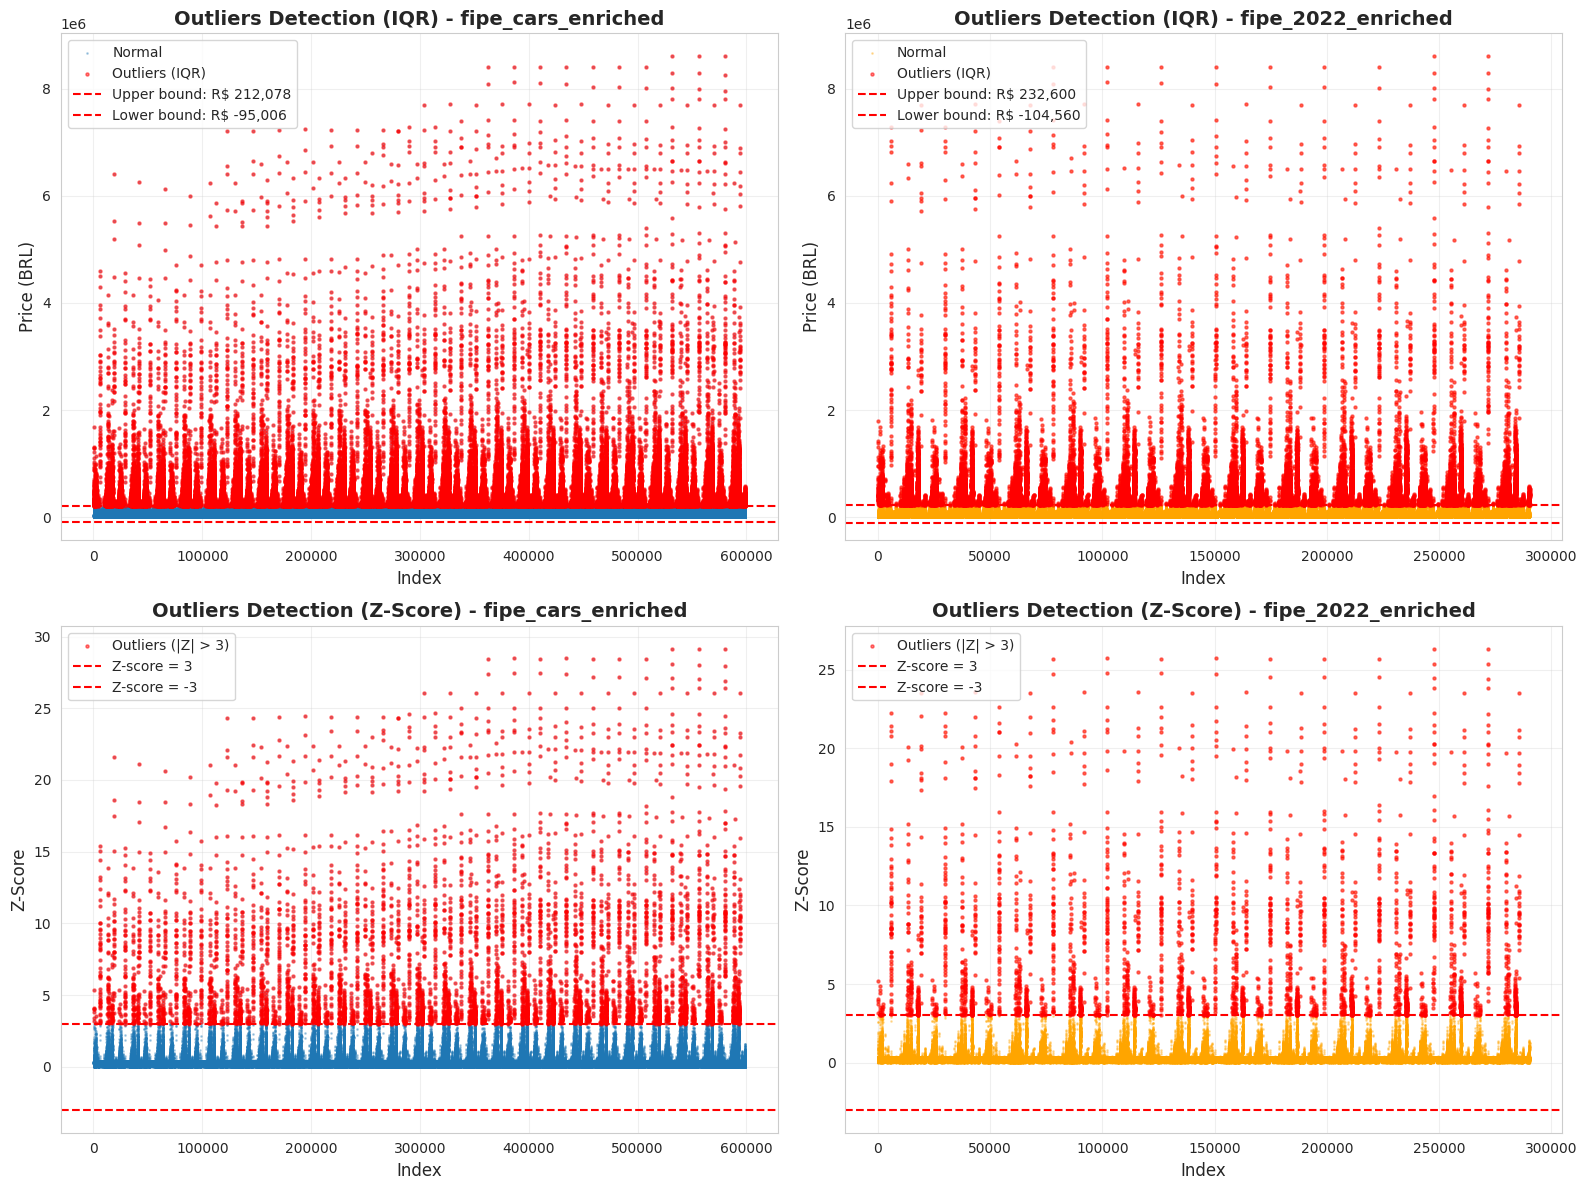

In [11]:
# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# IQR outliers visualization - fipe_cars_enriched
axes[0, 0].scatter(range(len(df_cars)), df_cars['price'], alpha=0.3, s=1, label='Normal')
axes[0, 0].scatter(df_cars[df_cars['price'].isin(outliers_cars)].index, outliers_cars, 
                   alpha=0.5, s=5, color='red', label='Outliers (IQR)')
axes[0, 0].axhline(y=ub_cars, color='r', linestyle='--', label=f'Upper bound: R$ {ub_cars:,.0f}')
axes[0, 0].axhline(y=lb_cars, color='r', linestyle='--', label=f'Lower bound: R$ {lb_cars:,.0f}')
axes[0, 0].set_title('Outliers Detection (IQR) - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Index', fontsize=12)
axes[0, 0].set_ylabel('Price (BRL)', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# IQR outliers visualization - fipe_2022_enriched
axes[0, 1].scatter(range(len(df_2022)), df_2022['price'], alpha=0.3, s=1, label='Normal', color='orange')
axes[0, 1].scatter(df_2022[df_2022['price'].isin(outliers_2022)].index, outliers_2022, 
                   alpha=0.5, s=5, color='red', label='Outliers (IQR)')
axes[0, 1].axhline(y=ub_2022, color='r', linestyle='--', label=f'Upper bound: R$ {ub_2022:,.0f}')
axes[0, 1].axhline(y=lb_2022, color='r', linestyle='--', label=f'Lower bound: R$ {lb_2022:,.0f}')
axes[0, 1].set_title('Outliers Detection (IQR) - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Index', fontsize=12)
axes[0, 1].set_ylabel('Price (BRL)', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Z-score outliers visualization - fipe_cars_enriched
axes[1, 0].scatter(range(len(df_cars)), z_scores_cars, alpha=0.3, s=1)
axes[1, 0].scatter(df_cars[z_scores_cars > 3].index, z_scores_cars[z_scores_cars > 3], 
                   alpha=0.5, s=5, color='red', label='Outliers (|Z| > 3)')
axes[1, 0].axhline(y=3, color='r', linestyle='--', label='Z-score = 3')
axes[1, 0].axhline(y=-3, color='r', linestyle='--', label='Z-score = -3')
axes[1, 0].set_title('Outliers Detection (Z-Score) - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Index', fontsize=12)
axes[1, 0].set_ylabel('Z-Score', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Z-score outliers visualization - fipe_2022_enriched
axes[1, 1].scatter(range(len(df_2022)), z_scores_2022, alpha=0.3, s=1, color='orange')
axes[1, 1].scatter(df_2022[z_scores_2022 > 3].index, z_scores_2022[z_scores_2022 > 3], 
                   alpha=0.5, s=5, color='red', label='Outliers (|Z| > 3)')
axes[1, 1].axhline(y=3, color='r', linestyle='--', label='Z-score = 3')
axes[1, 1].axhline(y=-3, color='r', linestyle='--', label='Z-score = -3')
axes[1, 1].set_title('Outliers Detection (Z-Score) - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Index', fontsize=12)
axes[1, 1].set_ylabel('Z-Score', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Price Ranges by Vehicle Category


In [12]:
# Define price ranges
def categorize_price(price):
    """Categorize price into ranges."""
    if price < 20000:
        return 'Very Low (< R$ 20k)'
    elif price < 50000:
        return 'Low (R$ 20k - 50k)'
    elif price < 100000:
        return 'Medium (R$ 50k - 100k)'
    elif price < 200000:
        return 'High (R$ 100k - 200k)'
    elif price < 500000:
        return 'Very High (R$ 200k - 500k)'
    else:
        return 'Luxury (> R$ 500k)'

# Add price category column
df_cars['price_category'] = df_cars['price'].apply(categorize_price)
df_2022['price_category'] = df_2022['price'].apply(categorize_price)

# Price ranges distribution
print("="*60)
print("Price Ranges Distribution - fipe_cars_enriched")
print("="*60)
price_range_counts = df_cars['price_category'].value_counts().sort_index()
price_range_pct = (price_range_counts / len(df_cars)) * 100
price_range_df = pd.DataFrame({
    'Count': price_range_counts,
    'Percentage': price_range_pct
})
print(price_range_df)

print("\n" + "="*60)
print("Price Ranges Distribution - fipe_2022_enriched")
print("="*60)
price_range_counts_2022 = df_2022['price_category'].value_counts().sort_index()
price_range_pct_2022 = (price_range_counts_2022 / len(df_2022)) * 100
price_range_df_2022 = pd.DataFrame({
    'Count': price_range_counts_2022,
    'Percentage': price_range_pct_2022
})
print(price_range_df_2022)


Price Ranges Distribution - fipe_cars_enriched
                             Count  Percentage
price_category                                
High (R$ 100k - 200k)        73626       12.29
Low (R$ 20k - 50k)          182361       30.44
Luxury (> R$ 500k)           22482        3.75
Medium (R$ 50k - 100k)      123208       20.57
Very High (R$ 200k - 500k)   48853        8.16
Very Low (< R$ 20k)         148477       24.79

Price Ranges Distribution - fipe_2022_enriched
                            Count  Percentage
price_category                               
High (R$ 100k - 200k)       38676       13.32
Low (R$ 20k - 50k)          85785       29.55
Luxury (> R$ 500k)          12262        4.22
Medium (R$ 50k - 100k)      61909       21.33
Very High (R$ 200k - 500k)  26039        8.97
Very Low (< R$ 20k)         65604       22.60


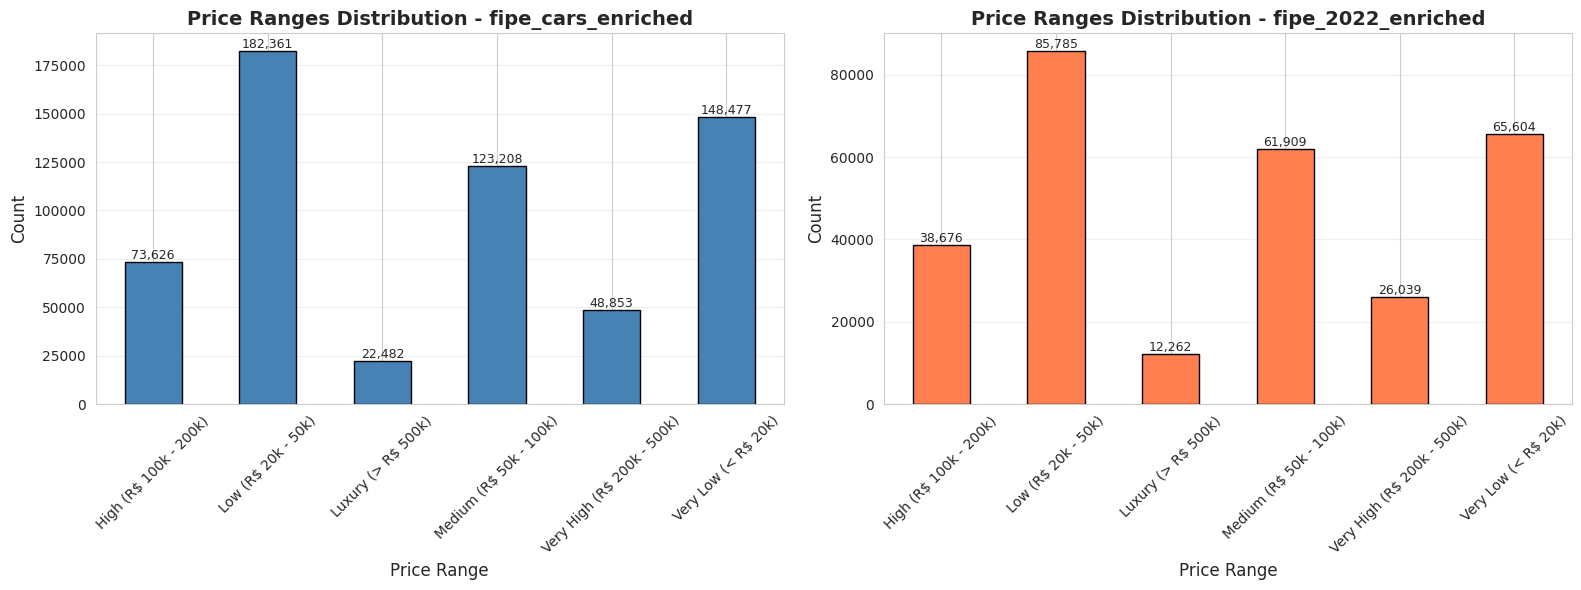

In [13]:
# Visualize price ranges
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Price ranges - fipe_cars_enriched
price_range_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Price Ranges Distribution - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price Range', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(price_range_counts):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)

# Price ranges - fipe_2022_enriched
price_range_counts_2022.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Price Ranges Distribution - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price Range', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(price_range_counts_2022):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipykernel_19/1851567849.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(data_by_category, labels=labels_by_category, patch_artist=True)
/tmp/ipykernel_19/1851567849.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(data_by_category_2022, labels=labels_by_category_2022, patch_artist=True)


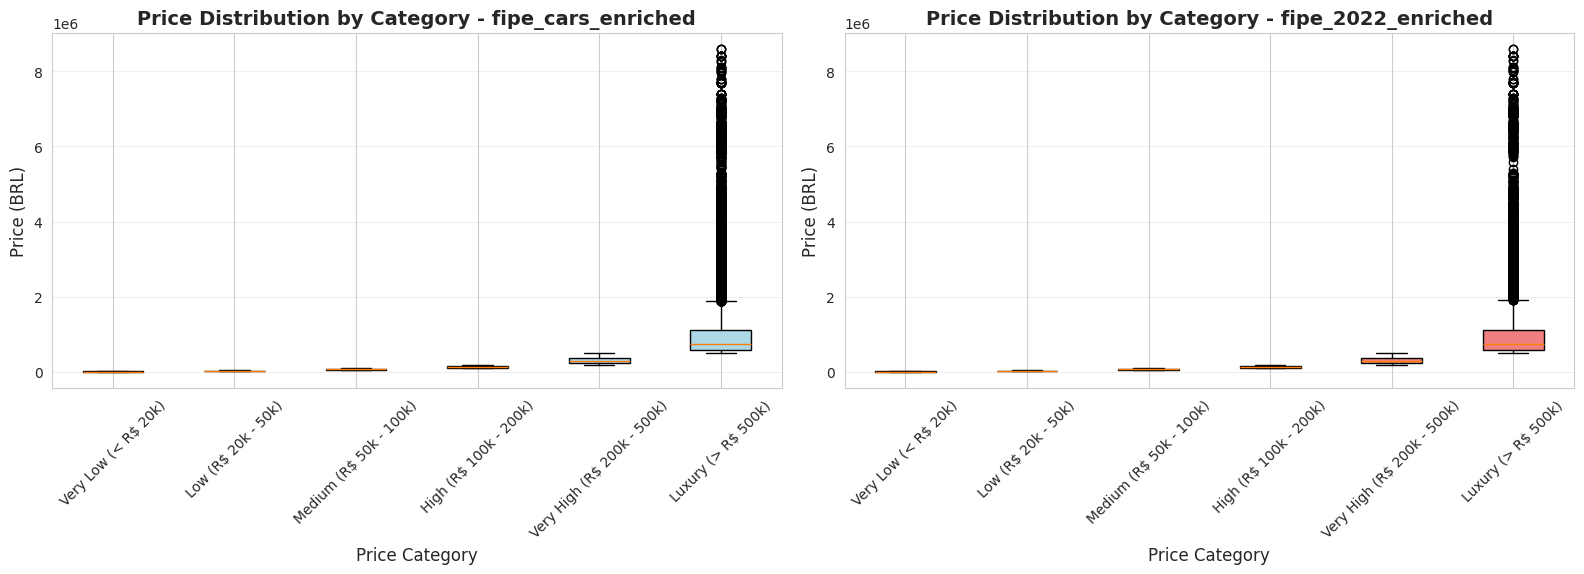

In [14]:
# Box plots by price category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot by price category - fipe_cars_enriched
categories = ['Very Low (< R$ 20k)', 'Low (R$ 20k - 50k)', 'Medium (R$ 50k - 100k)', 
              'High (R$ 100k - 200k)', 'Very High (R$ 200k - 500k)', 'Luxury (> R$ 500k)']
data_by_category = [df_cars[df_cars['price_category'] == cat]['price'].values for cat in categories if cat in df_cars['price_category'].values]
labels_by_category = [cat for cat in categories if cat in df_cars['price_category'].values]

bp1 = axes[0].boxplot(data_by_category, labels=labels_by_category, patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_title('Price Distribution by Category - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price Category', fontsize=12)
axes[0].set_ylabel('Price (BRL)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot by price category - fipe_2022_enriched
data_by_category_2022 = [df_2022[df_2022['price_category'] == cat]['price'].values for cat in categories if cat in df_2022['price_category'].values]
labels_by_category_2022 = [cat for cat in categories if cat in df_2022['price_category'].values]

bp2 = axes[1].boxplot(data_by_category_2022, labels=labels_by_category_2022, patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')
axes[1].set_title('Price Distribution by Category - fipe_2022_enriched', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price Category', fontsize=12)
axes[1].set_ylabel('Price (BRL)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 6. Price Trends Over Time


In [15]:
# Price trends by year_of_reference
price_by_year = df_cars.groupby('year_of_reference')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
price_by_year.columns = ['year', 'mean_price', 'median_price', 'std_price', 'count']

print("="*60)
print("Price Trends by Year of Reference - fipe_cars_enriched")
print("="*60)
print(price_by_year.to_string(index=False))


Price Trends by Year of Reference - fipe_cars_enriched
 year  mean_price  median_price  std_price  count
 2021    99436.39      39043.00  250278.83 284229
 2022   122087.21      46836.00  321913.89 290275
 2023   127983.84      48136.00  340294.09  24503


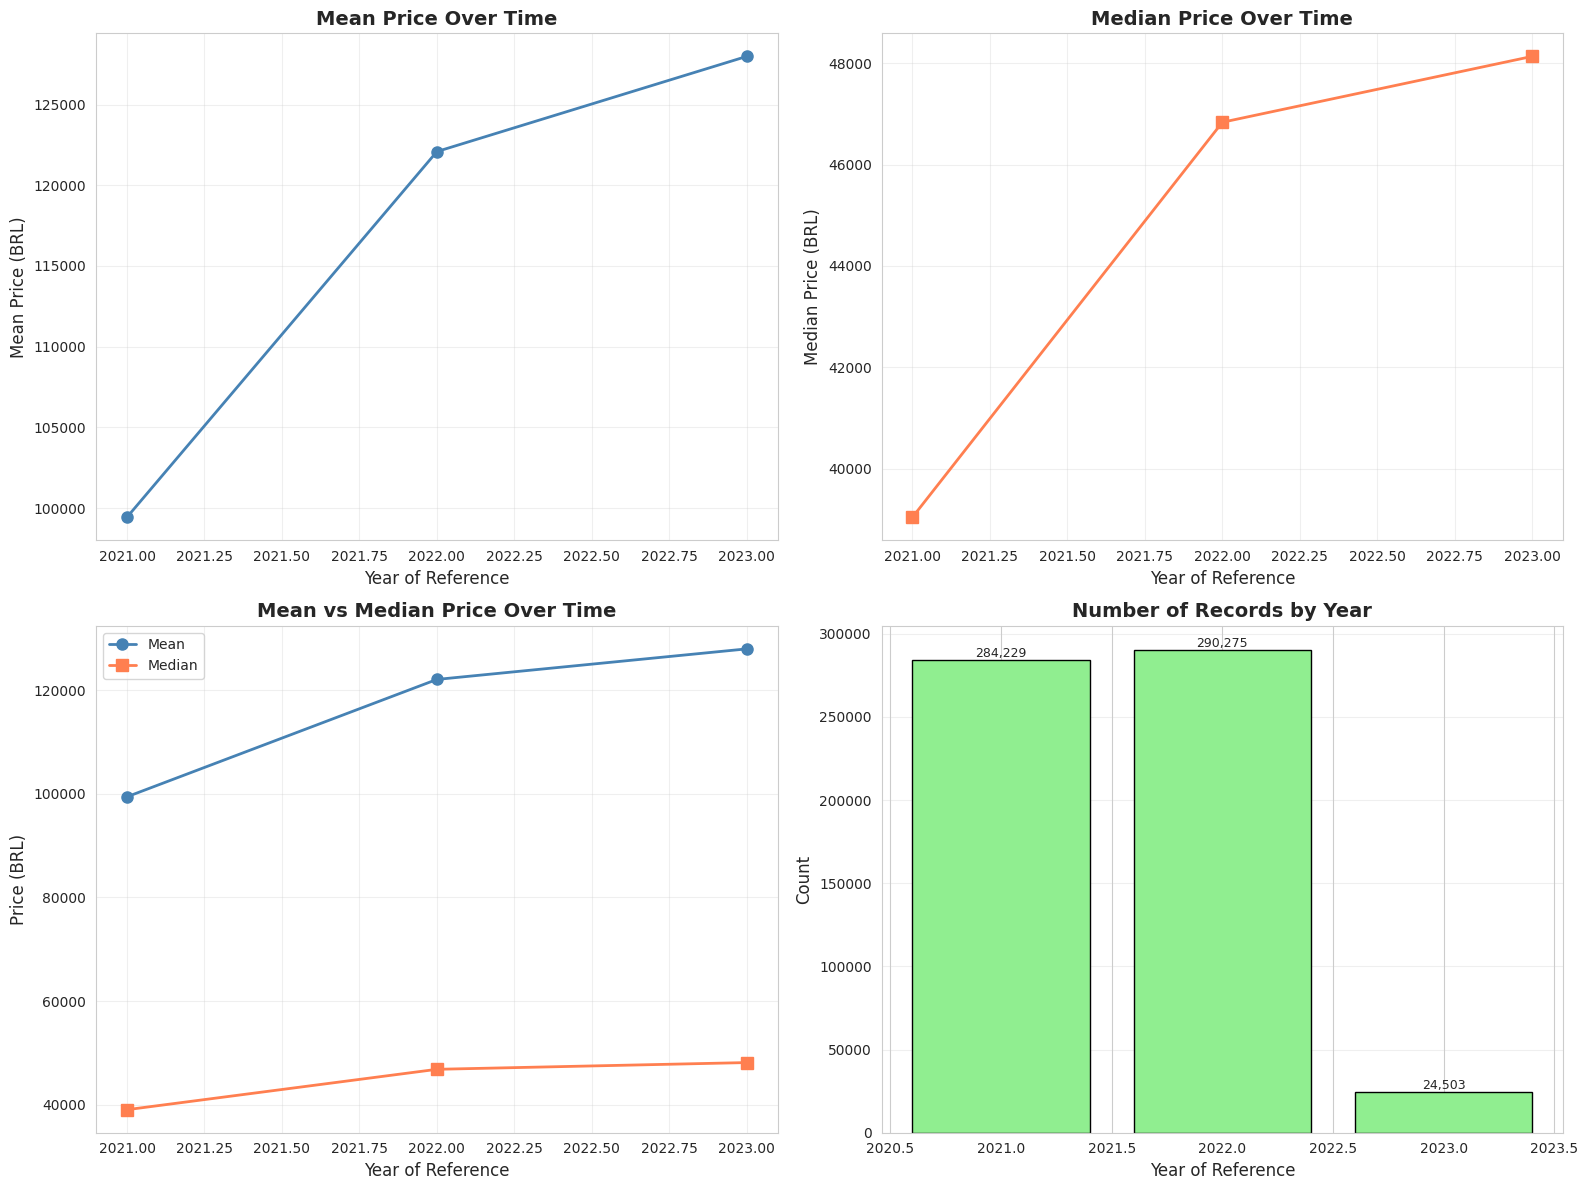

In [16]:
# Visualize price trends over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean price over time
axes[0, 0].plot(price_by_year['year'], price_by_year['mean_price'], marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].set_title('Mean Price Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year of Reference', fontsize=12)
axes[0, 0].set_ylabel('Mean Price (BRL)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Median price over time
axes[0, 1].plot(price_by_year['year'], price_by_year['median_price'], marker='s', linewidth=2, markersize=8, color='coral')
axes[0, 1].set_title('Median Price Over Time', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year of Reference', fontsize=12)
axes[0, 1].set_ylabel('Median Price (BRL)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Mean and median together
axes[1, 0].plot(price_by_year['year'], price_by_year['mean_price'], marker='o', linewidth=2, markersize=8, label='Mean', color='steelblue')
axes[1, 0].plot(price_by_year['year'], price_by_year['median_price'], marker='s', linewidth=2, markersize=8, label='Median', color='coral')
axes[1, 0].set_title('Mean vs Median Price Over Time', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year of Reference', fontsize=12)
axes[1, 0].set_ylabel('Price (BRL)', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Number of records per year
axes[1, 1].bar(price_by_year['year'], price_by_year['count'], color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Number of Records by Year', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year of Reference', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(price_by_year['count']):
    axes[1, 1].text(price_by_year['year'].iloc[i], v, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 7. Price by Brand


In [17]:
# Price statistics by brand
price_by_brand = df_cars.groupby('brand')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
price_by_brand.columns = ['brand', 'mean_price', 'median_price', 'std_price', 'count']
price_by_brand = price_by_brand.sort_values('mean_price', ascending=False)

print("="*60)
print("Top 20 Brands by Mean Price - fipe_cars_enriched")
print("="*60)
print(price_by_brand.head(20).to_string(index=False))

print("\n" + "="*60)
print("Bottom 20 Brands by Mean Price - fipe_cars_enriched")
print("="*60)
print(price_by_brand.tail(20).to_string(index=False))


Top 20 Brands by Mean Price - fipe_cars_enriched
        brand  mean_price  median_price  std_price  count
  Rolls-Royce  3576758.59    3042664.50 1527800.84    732
      Mclaren  2962461.67    2889884.00 1218895.62    685
      Ferrari  2688672.78    2592033.00 1826591.92   1667
 ASTON MARTIN   851008.12     692860.00  424040.56    506
      Porsche   579768.75     535308.00  380714.36  13841
     Maserati   484001.00     416621.00  418780.32   2857
          RAM   400919.51     434841.00   99660.42    487
       AM Gen   345908.03     369785.00   98860.15    225
   Land Rover   262439.08     172657.00  243545.43  14259
       Jaguar   258039.79     244765.50  162154.92   5730
Mercedes-Benz   227130.09     141261.00  296557.75  35982
          BMW   218673.05     145703.00  216390.86  20713
   CAB Motors   205991.29     208063.50   15195.64     78
        Lexus   194460.58     158572.00  166542.34   3552
        IVECO   190014.02     180282.00   47768.48   1861
         Audi   156794.

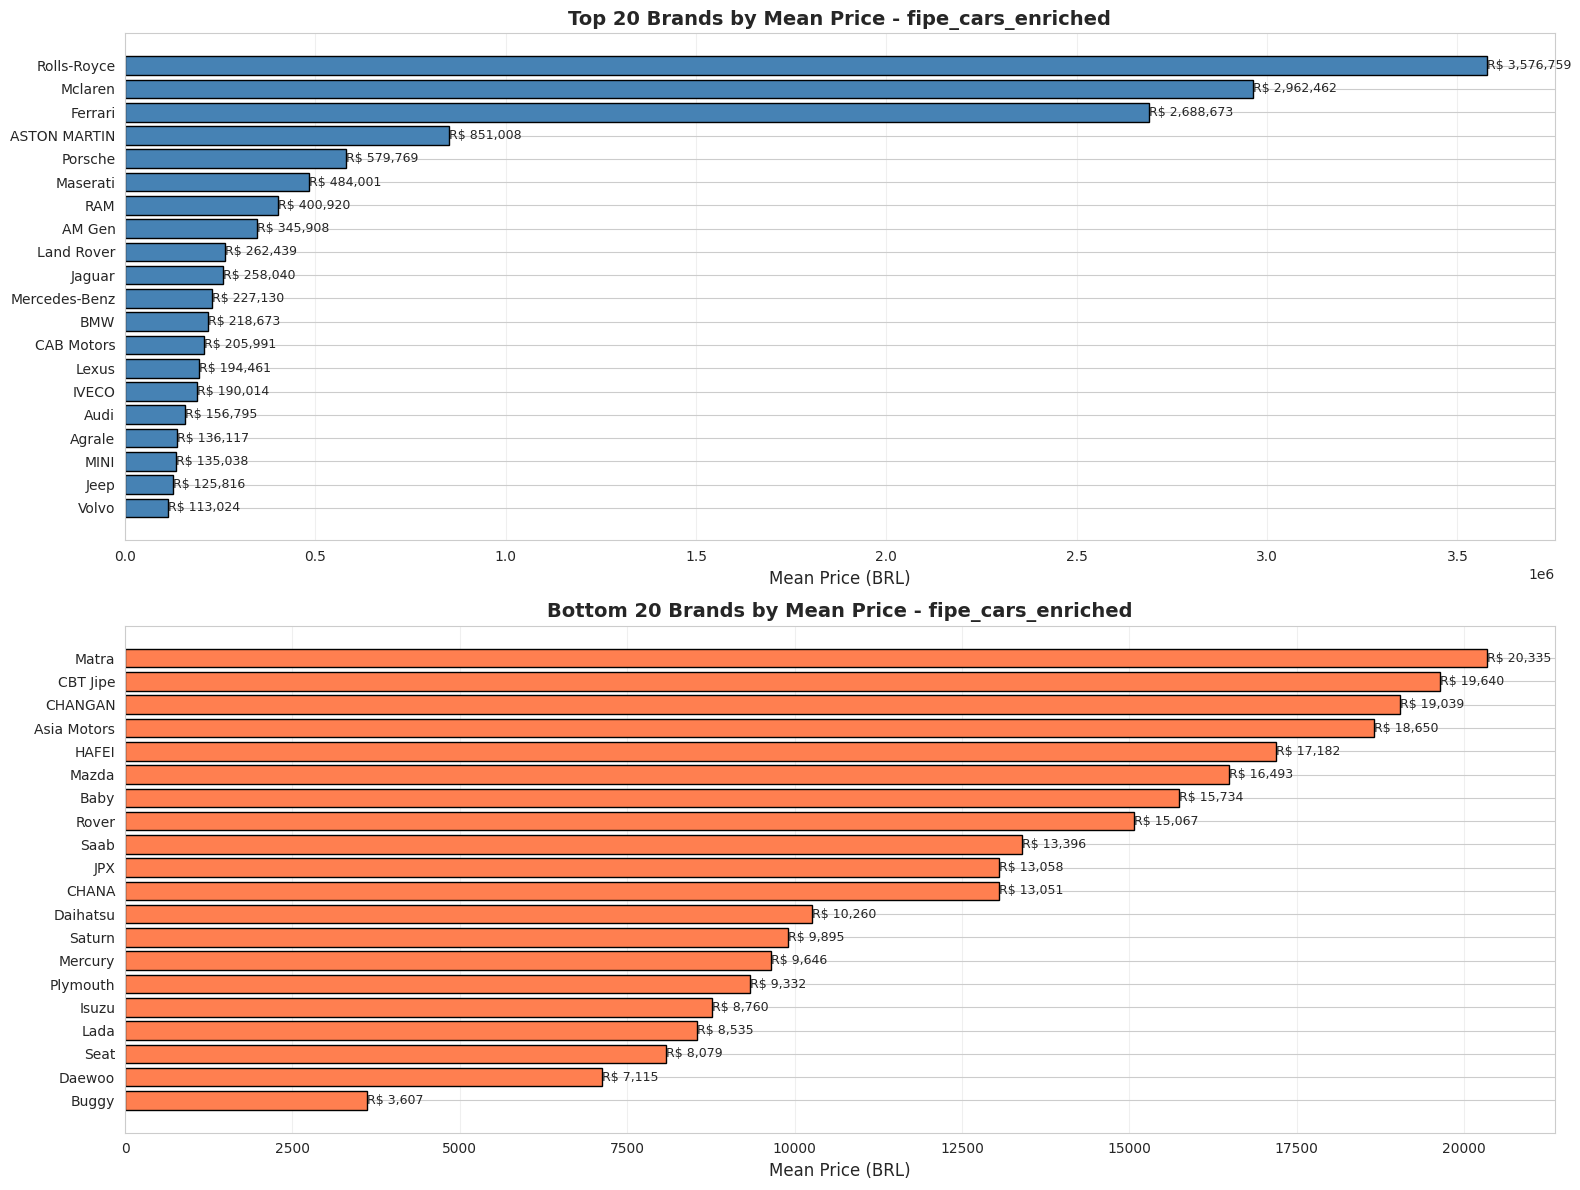

In [18]:
# Visualize top brands by mean price
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Top 20 brands by mean price
top_brands = price_by_brand.head(20)
axes[0].barh(range(len(top_brands)), top_brands['mean_price'], color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_brands)))
axes[0].set_yticklabels(top_brands['brand'])
axes[0].set_xlabel('Mean Price (BRL)', fontsize=12)
axes[0].set_title('Top 20 Brands by Mean Price - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()
for i, v in enumerate(top_brands['mean_price']):
    axes[0].text(v, i, f'R$ {v:,.0f}', va='center', fontsize=9)

# Bottom 20 brands by mean price
bottom_brands = price_by_brand.tail(20)
axes[1].barh(range(len(bottom_brands)), bottom_brands['mean_price'], color='coral', edgecolor='black')
axes[1].set_yticks(range(len(bottom_brands)))
axes[1].set_yticklabels(bottom_brands['brand'])
axes[1].set_xlabel('Mean Price (BRL)', fontsize=12)
axes[1].set_title('Bottom 20 Brands by Mean Price - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()
for i, v in enumerate(bottom_brands['mean_price']):
    axes[1].text(v, i, f'R$ {v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipykernel_19/2565207511.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_brand, labels=top_brands_by_count, patch_artist=True)


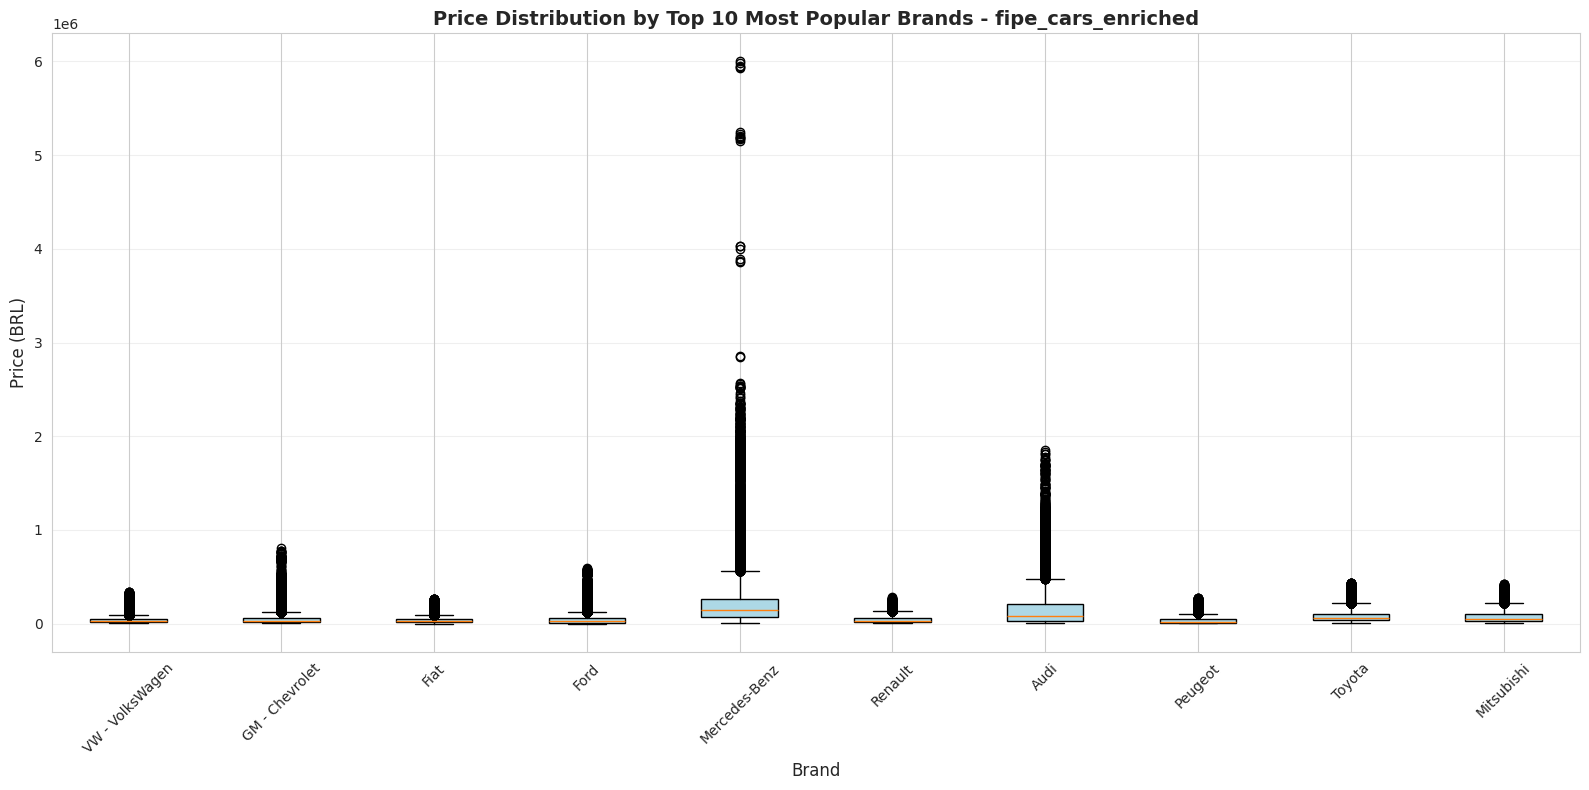

In [19]:
# Box plot for top 10 brands by count (most popular brands)
top_brands_by_count = df_cars['brand'].value_counts().head(10).index.tolist()
df_top_brands = df_cars[df_cars['brand'].isin(top_brands_by_count)]

fig, ax = plt.subplots(figsize=(16, 8))
data_by_brand = [df_top_brands[df_top_brands['brand'] == brand]['price'].values for brand in top_brands_by_count]
bp = ax.boxplot(data_by_brand, labels=top_brands_by_count, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax.set_title('Price Distribution by Top 10 Most Popular Brands - fipe_cars_enriched', fontsize=14, fontweight='bold')
ax.set_xlabel('Brand', fontsize=12)
ax.set_ylabel('Price (BRL)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## 8. Price by Model


In [20]:
# Price statistics by model (top models by count to avoid too many unique values)
model_counts = df_cars['model'].value_counts()
top_models = model_counts.head(30).index.tolist()  # Top 30 models by frequency

price_by_model = df_cars[df_cars['model'].isin(top_models)].groupby('model')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
price_by_model.columns = ['model', 'mean_price', 'median_price', 'std_price', 'count']
price_by_model = price_by_model.sort_values('mean_price', ascending=False)

print("="*60)
print("Top 30 Models by Mean Price (from most popular models) - fipe_cars_enriched")
print("="*60)
print(price_by_model.to_string(index=False))


Top 30 Models by Mean Price (from most popular models) - fipe_cars_enriched
                                   model  mean_price  median_price  std_price  count
       911 Turbo Coupe 3.6/3.8 (991/992)   635967.76     501238.00  456070.48    531
                   Cayenne Turbo 4.5/4.8   241802.32     189247.50  161676.09    400
   Corvette 5.7/ 6.0, 6.2 Targa/Stingray   218341.38     137565.50  173370.72    550
   S-600 L/ L Classic/ Wagon Classic 6.0   172249.33     155823.50  107411.09    500
           SL-500 5.0 e 5.5/ Classic 5.0   157813.94     140925.50   62725.52    450
Pajero HPE Full 3.2 4x4 T.I.Dies. 5p Aut   157432.07     132729.00   82212.11    415
         MARRUÁ AM 200 2.8 CS TDI Diesel   155532.20     113075.00  105317.22    411
                               S-500 5.0   115230.67      89679.00   79980.83    475
               HR 2.5 TCI Diesel (RS/RD)    82979.77      75957.00   31708.42    472
      Forester 2.0/2.0 S/2.0 ES 4x4 Aut.    66323.70      39142.50   54514

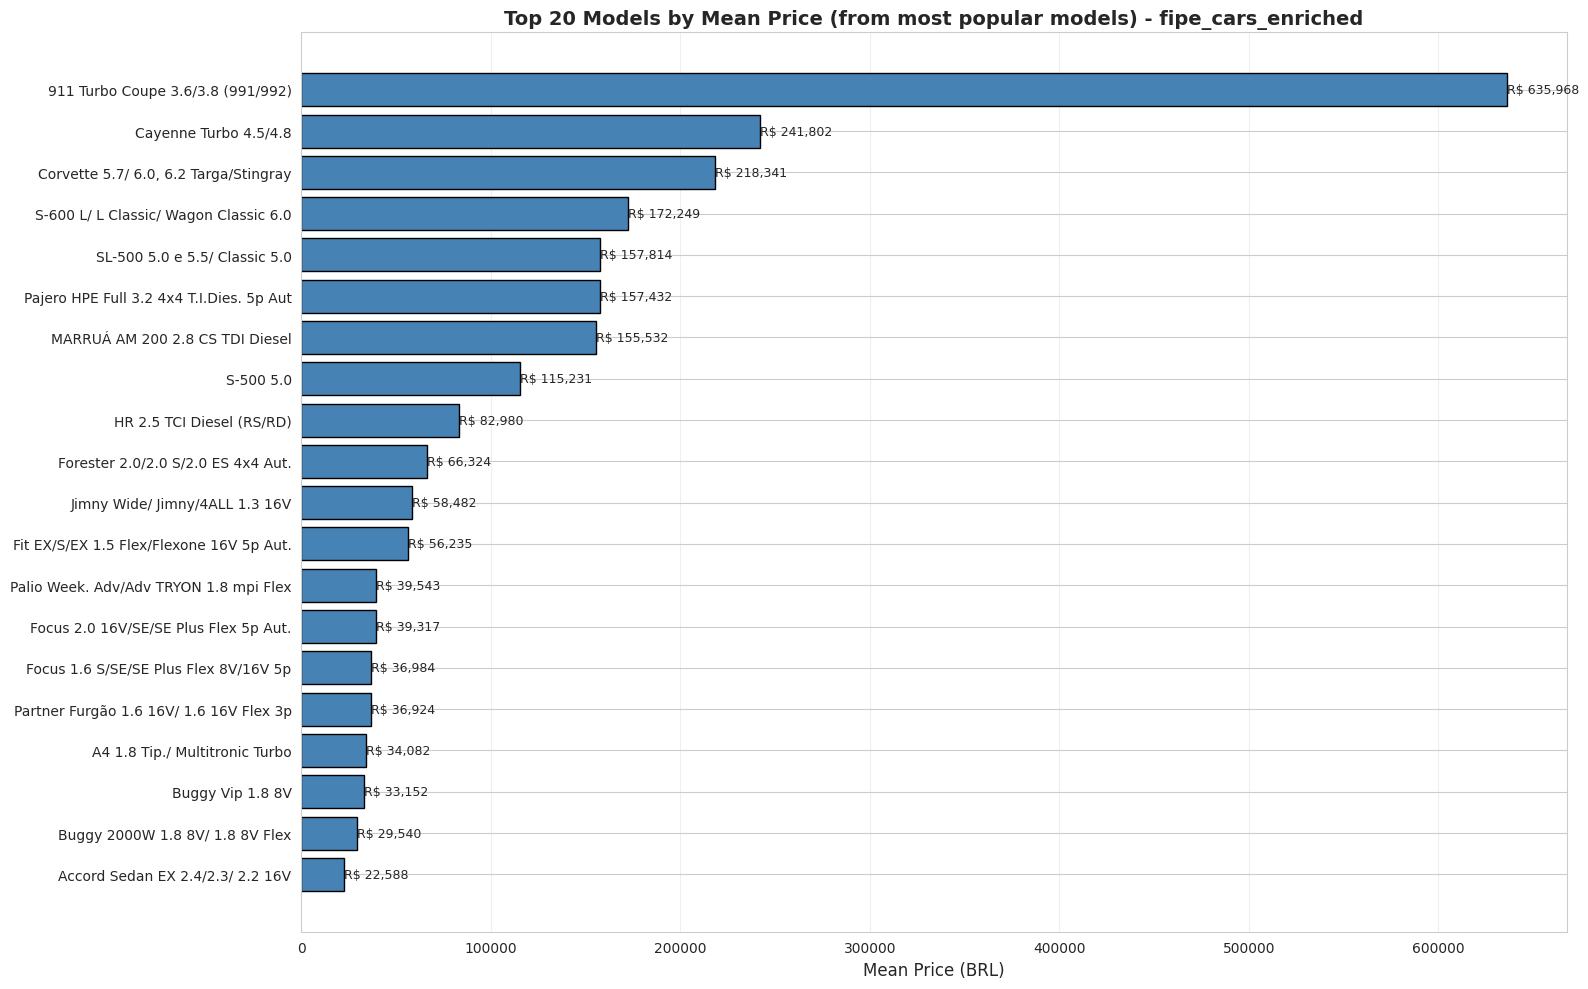

In [21]:
# Visualize top models by mean price
fig, ax = plt.subplots(figsize=(16, 10))
top_models_plot = price_by_model.head(20)
ax.barh(range(len(top_models_plot)), top_models_plot['mean_price'], color='steelblue', edgecolor='black')
ax.set_yticks(range(len(top_models_plot)))
ax.set_yticklabels(top_models_plot['model'])
ax.set_xlabel('Mean Price (BRL)', fontsize=12)
ax.set_title('Top 20 Models by Mean Price (from most popular models) - fipe_cars_enriched', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()
for i, v in enumerate(top_models_plot['mean_price']):
    ax.text(v, i, f'R$ {v:,.0f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()


## 9. Price by State


In [22]:
# Price statistics by state
price_by_state = df_cars.groupby('state')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
price_by_state.columns = ['state', 'mean_price', 'median_price', 'std_price', 'count']
price_by_state = price_by_state.sort_values('mean_price', ascending=False)

print("="*60)
print("Price Statistics by State - fipe_cars_enriched")
print("="*60)
print(price_by_state.to_string(index=False))


Price Statistics by State - fipe_cars_enriched
state  mean_price  median_price  std_price  count
   RR   119676.22      41604.00  368784.50   3097
   PI   116734.66      43319.00  320128.59   6305
   AC   115240.56      42130.00  337023.37   3183
   RO   115012.06      42670.50  327578.89   6184
   AP   114963.97      43945.00  289987.22   3231
   RN   114468.86      43677.00  313190.71   6122
   GO   114400.52      42510.50  329297.84  18930
   MA   114037.87      42924.00  295378.87  18805
   PA   113597.08      42526.50  303013.82  12572
   MT   113321.68      43326.00  306444.58  12418
   TO   113106.70      42671.00  306486.34   6137
   SC   113023.67      43527.00  303229.24  18784
   RJ   112839.43      43001.50  302675.36  49738
   BA   111849.21      42585.00  293858.69  43854
   MG   111706.02      43467.00  290727.63  62508
   PB   111541.72      42885.50  292645.09  12664
   PE   111270.84      43169.00  286911.75  25189
   ES   110948.61      43912.00  282336.86  12641
   

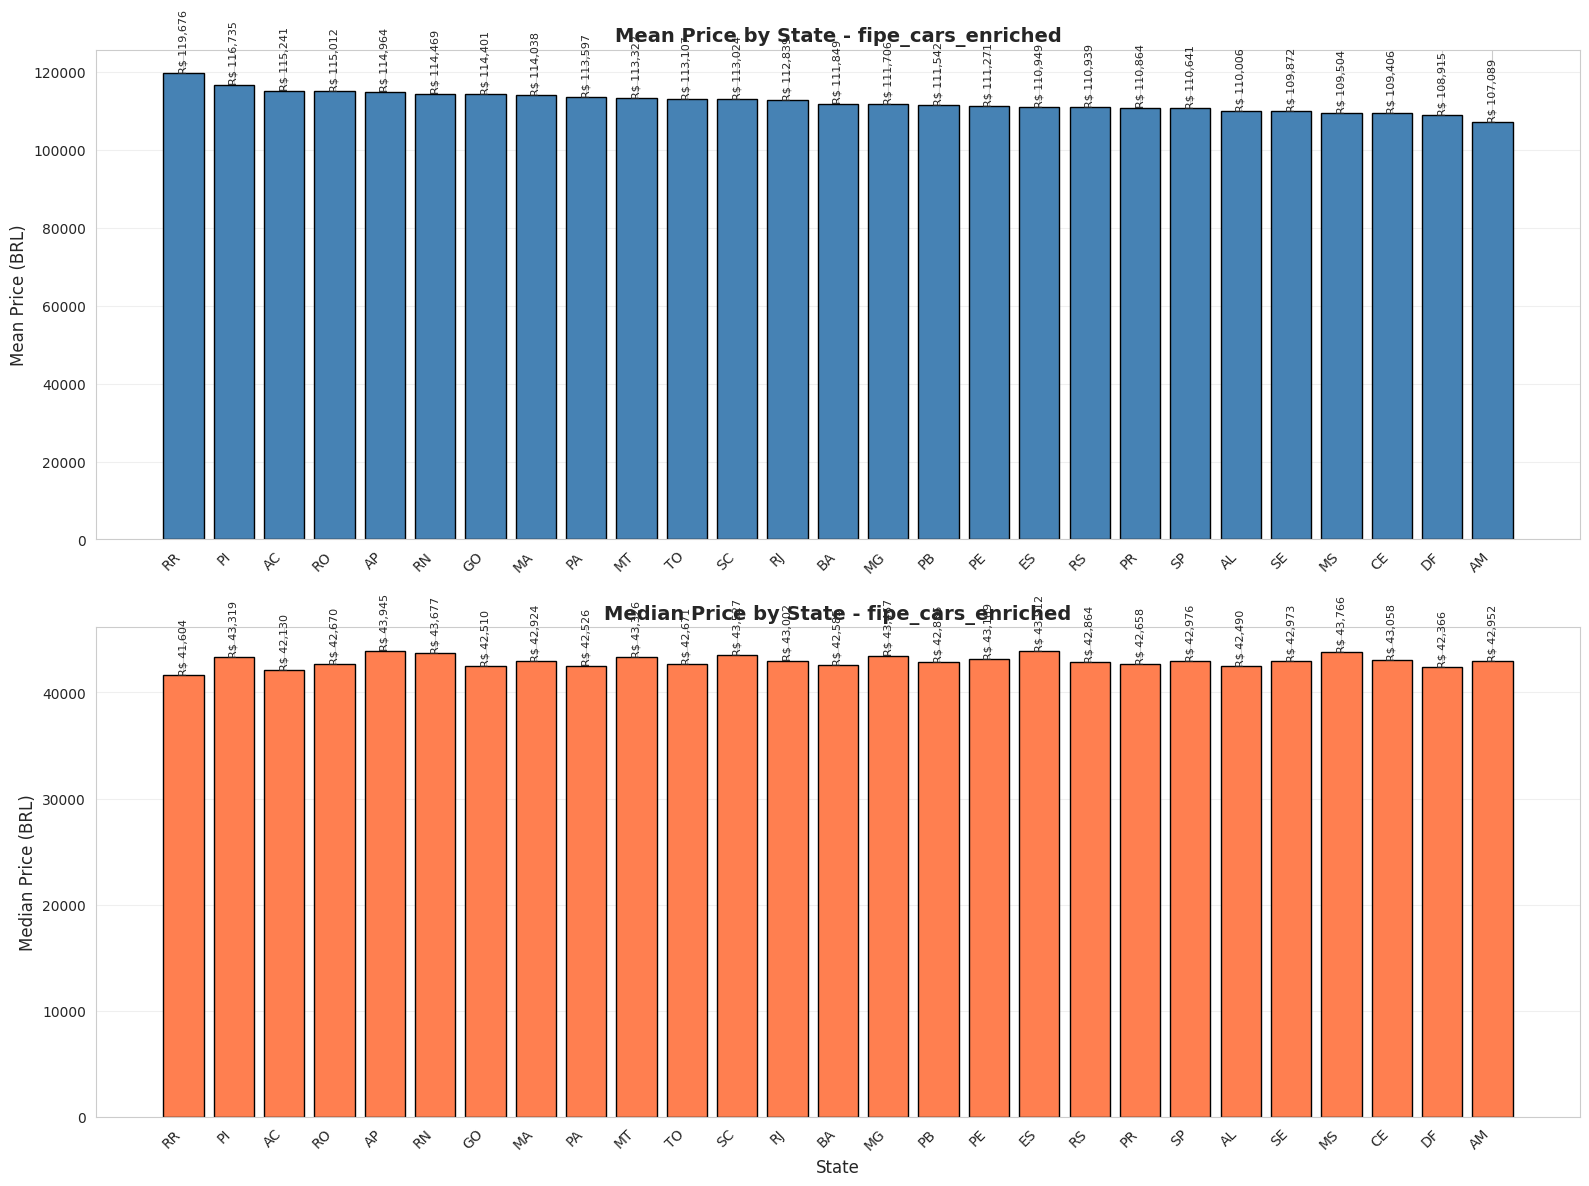

In [23]:
# Visualize price by state
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Mean price by state
axes[0].bar(range(len(price_by_state)), price_by_state['mean_price'], color='steelblue', edgecolor='black')
axes[0].set_xticks(range(len(price_by_state)))
axes[0].set_xticklabels(price_by_state['state'], rotation=45, ha='right')
axes[0].set_ylabel('Mean Price (BRL)', fontsize=12)
axes[0].set_title('Mean Price by State - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(price_by_state['mean_price']):
    axes[0].text(i, v, f'R$ {v:,.0f}', ha='center', va='bottom', fontsize=8, rotation=90)

# Median price by state
axes[1].bar(range(len(price_by_state)), price_by_state['median_price'], color='coral', edgecolor='black')
axes[1].set_xticks(range(len(price_by_state)))
axes[1].set_xticklabels(price_by_state['state'], rotation=45, ha='right')
axes[1].set_ylabel('Median Price (BRL)', fontsize=12)
axes[1].set_title('Median Price by State - fipe_cars_enriched', fontsize=14, fontweight='bold')
axes[1].set_xlabel('State', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(price_by_state['median_price']):
    axes[1].text(i, v, f'R$ {v:,.0f}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


/tmp/ipykernel_19/1033520063.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_state, labels=price_by_state['state'], patch_artist=True)


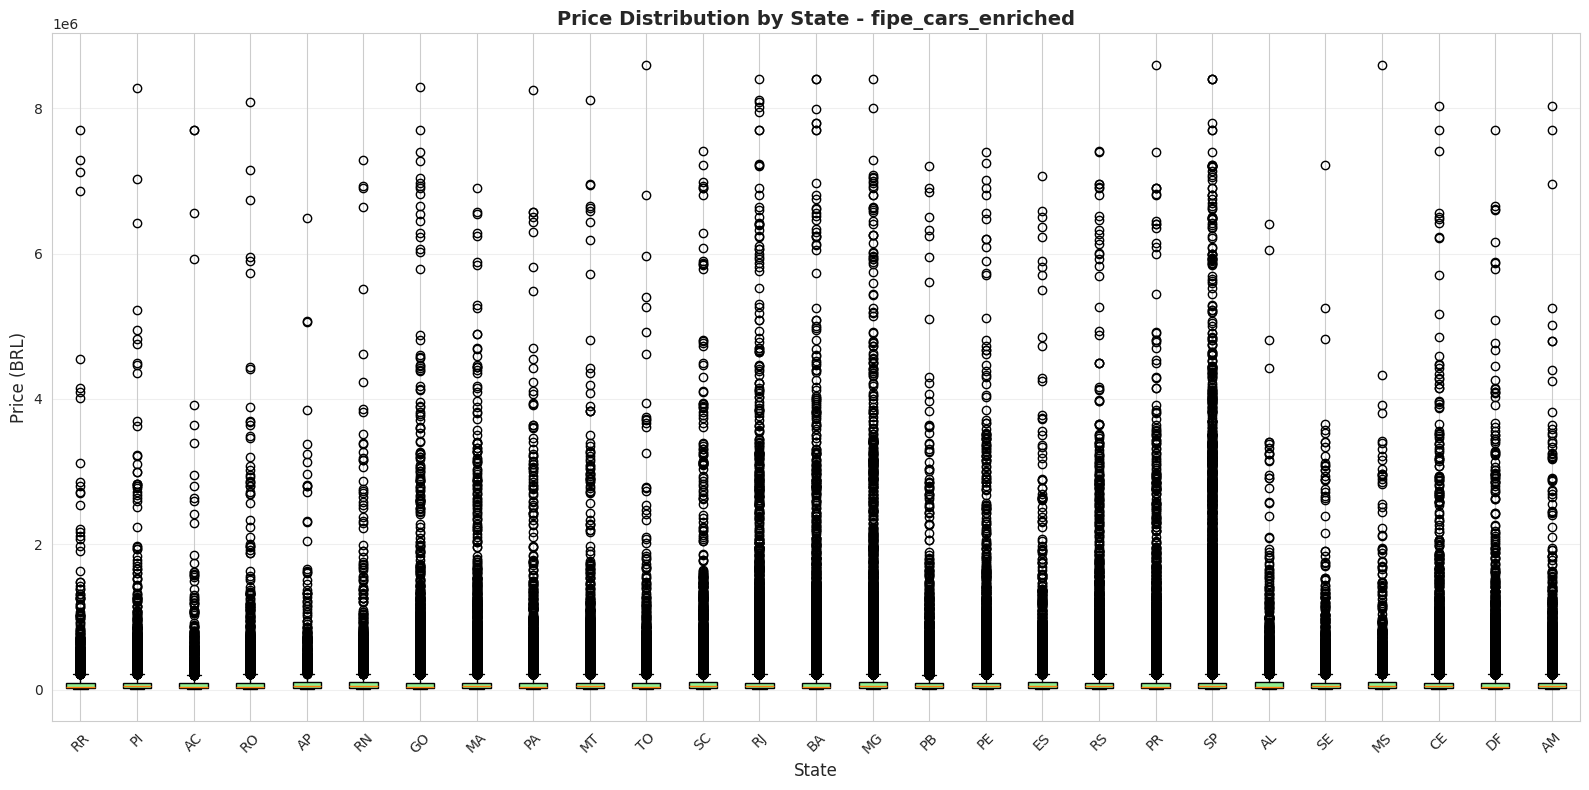

In [24]:
# Box plot for price by state
fig, ax = plt.subplots(figsize=(16, 8))
data_by_state = [df_cars[df_cars['state'] == state]['price'].values for state in price_by_state['state']]
bp = ax.boxplot(data_by_state, labels=price_by_state['state'], patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightgreen')
ax.set_title('Price Distribution by State - fipe_cars_enriched', fontsize=14, fontweight='bold')
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Price (BRL)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## 10. Summary and Key Findings


In [25]:
print("="*60)
print("SUMMARY - Target Variable Analysis")
print("="*60)

print("\n📊 Price Distribution:")
print(f"  • Mean price (fipe_cars): R$ {df_cars['price'].mean():,.2f}")
print(f"  • Median price (fipe_cars): R$ {df_cars['price'].median():,.2f}")
print(f"  • Std deviation (fipe_cars): R$ {df_cars['price'].std():,.2f}")
print(f"  • Min price: R$ {df_cars['price'].min():,.2f}")
print(f"  • Max price: R$ {df_cars['price'].max():,.2f}")

print("\n📈 Skewness and Kurtosis:")
print(f"  • Skewness (fipe_cars): {skew_cars:.4f} - {'Highly right-skewed' if skew_cars > 1 else 'Moderately right-skewed' if skew_cars > 0.5 else 'Approximately symmetric'}")
print(f"  • Kurtosis (fipe_cars): {kurt_cars:.4f} - {'Heavy tails' if kurt_cars > 3 else 'Normal/Light tails'}")

print("\n🔍 Outliers:")
print(f"  • IQR method outliers (fipe_cars): {len(outliers_cars):,} ({(len(outliers_cars)/len(df_cars)*100):.2f}%)")
print(f"  • Z-score method outliers (fipe_cars): {len(outliers_z_cars):,} ({(len(outliers_z_cars)/len(df_cars)*100):.2f}%)")

print("\n💰 Price Ranges:")
for category in price_range_counts.index:
    count = price_range_counts[category]
    pct = (count / len(df_cars)) * 100
    print(f"  • {category}: {count:,} ({pct:.2f}%)")

print("\n📅 Price Trends:")
print(f"  • Years analyzed: {price_by_year['year'].min()} - {price_by_year['year'].max()}")
print(f"  • Price change: R$ {price_by_year['mean_price'].iloc[0]:,.2f} → R$ {price_by_year['mean_price'].iloc[-1]:,.2f}")

print("\n🚗 Price by Brand:")
print(f"  • Highest mean price: {price_by_brand.iloc[0]['brand']} (R$ {price_by_brand.iloc[0]['mean_price']:,.2f})")
print(f"  • Lowest mean price: {price_by_brand.iloc[-1]['brand']} (R$ {price_by_brand.iloc[-1]['mean_price']:,.2f})")
print(f"  • Total brands: {len(price_by_brand)}")

print("\n📍 Price by State:")
print(f"  • Highest mean price: {price_by_state.iloc[0]['state']} (R$ {price_by_state.iloc[0]['mean_price']:,.2f})")
print(f"  • Lowest mean price: {price_by_state.iloc[-1]['state']} (R$ {price_by_state.iloc[-1]['mean_price']:,.2f})")
print(f"  • Total states: {len(price_by_state)}")

print("\n" + "="*60)
print("Key Insights:")
print("  → Price distribution is highly right-skewed, suggesting log transformation may be beneficial")
print("  → Significant number of outliers detected, especially high-value vehicles")
print("  → Price varies significantly by brand, model, and state")
print("  → Most vehicles fall in the low to medium price range (< R$ 100k)")
print("="*60)
print("\nNext Steps:")
print("  → Proceed to notebook 03_feature_analysis.ipynb")
print("  → Analyze individual features and their distributions")
print("  → Explore feature relationships")
print("="*60)


SUMMARY - Target Variable Analysis

📊 Price Distribution:
  • Mean price (fipe_cars): R$ 111,580.60
  • Median price (fipe_cars): R$ 42,989.00
  • Std deviation (fipe_cars): R$ 291,223.74
  • Min price: R$ 1,679.00
  • Max price: R$ 8,600,000.00

📈 Skewness and Kurtosis:
  • Skewness (fipe_cars): 11.6600 - Highly right-skewed
  • Kurtosis (fipe_cars): 201.6620 - Heavy tails

🔍 Outliers:
  • IQR method outliers (fipe_cars): 66,577 (11.11%)
  • Z-score method outliers (fipe_cars): 6,846 (1.14%)

💰 Price Ranges:
  • High (R$ 100k - 200k): 73,626 (12.29%)
  • Low (R$ 20k - 50k): 182,361 (30.44%)
  • Luxury (> R$ 500k): 22,482 (3.75%)
  • Medium (R$ 50k - 100k): 123,208 (20.57%)
  • Very High (R$ 200k - 500k): 48,853 (8.16%)
  • Very Low (< R$ 20k): 148,477 (24.79%)

📅 Price Trends:
  • Years analyzed: 2021 - 2023
  • Price change: R$ 99,436.39 → R$ 127,983.84

🚗 Price by Brand:
  • Highest mean price: Rolls-Royce (R$ 3,576,758.59)
  • Lowest mean price: Buggy (R$ 3,606.83)
  • Total brands